Index(['id', 'title', 'author', 'text', 'label'], dtype='object')
                                                    text  label    category
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  unreliable
1      Ever get the feeling your life circles the rou...      0    reliable
2      Why the Truth Might Get You Fired October 29, ...      1  unreliable
3      Videos 15 Civilians Killed In Single US Airstr...      1  unreliable
4      Print \nAn Iranian woman has been sentenced to...      1  unreliable
...                                                  ...    ...         ...
20795  Rapper T. I. unloaded on black celebrities who...      0    reliable
20796  When the Green Bay Packers lost to the Washing...      0    reliable
20797  The Macy’s of today grew from the union of sev...      0    reliable
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  unreliable
20799    David Swanson is an author, activist, journa...      1  unreliable

[20800 rows x 3 colum

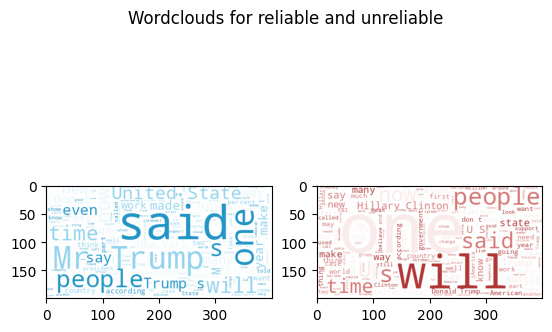

Accuracy: 0.8666923521479484


,Predicted reliable,Predicted unreliable
Is reliable,2320,242
Is unreliable,450,2179


In [ ]:
"""
Created on Mon Mar  6 13:27:07 2023
@author: casperbernards
@reviewer: Aziz Abbas
"""
##AZIZ EDIT: Set Seed to have reproducible results
import random

# Set a seed value
random.seed(42)

# Import the relevant packages
import pandas as pd
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


# id: unique id for a news article
# title: the title of a news article
# author: author of the news article
# text: the text of the article; could be incomplete
# label: a label that marks the article as potentially unreliable
# 0: reliable
# 1: unreliable



# Import and print the dataset - Loading the dataset might take some time because of the internet connection
#AZIZ EDIT: change "read.csv" to "read_csv", old code >> rawDF = pd.read.csv ('https://raw.githubusercontent.com/HAN-M3DM-Data-Mining/assignments/master/datasets/NB-fakenews.csv')
rawDF = pd.read_csv('https://raw.githubusercontent.com/HAN-M3DM-Data-Mining/assignments/master/datasets/NB-fakenews.csv')
rawDF



# print the column names
print(rawDF.columns)
# Drop unnecessary columns
cleanDF = rawDF.drop (['id', 'title','author'], axis = 1)

# define a dictionary to map label values to categories
label_map = {0: 'reliable', 1: 'unreliable'}

# create a new DataFrame with updated 'categorie' column
##AZIZ EDIT: change "type" to "label", old code >> EDIT:cleanDF2 = cleanDF.assign(category=cleanDF['type'].map(label_map))
cleanDF2 = cleanDF.assign(category=cleanDF['label'].map(label_map))


# print the updated DataFrame
print(cleanDF2)



# Categorise the data as "reliable" or "unreliable" and print this outcome
##AZIZ EDIT: spelling error, change "unrrliable" to "unreliable", old code >> catType = CategoricalDtype(categories=["reliable", "unrrliable"], ordered=False)
catType = CategoricalDtype(categories=["reliable", "unreliable"], ordered=False)
cleanDF2.category = cleanDF2.category.astype(catType)
cleanDF2.category


# Print the distribution of the messages using count
cleanDF2.category.value_counts()
# Print the same distribution but using relative numbers
cleanDF2.category.value_counts(normalize=True)



# Generate a word cloud image
## Note to teacher: used str to convert text
reliableText = ' '.join([str(Text) for Text in cleanDF2[cleanDF2['category']=='reliable']['text'].astype(str)])
##AZIZ EDIT: spelling error, change "catagory" to "category", old code >> unreliableText = ' '.join([str(Text) for Text in cleanDF2[cleanDF2['catagory']=='unreliable']['text'].astype(str)])
unreliableText = ' '.join([str(Text) for Text in cleanDF2[cleanDF2['category']=='unreliable']['text'].astype(str)])
colorListReliable=['#e9f6fb','#92d2ed','#2195c5']
colorListUnreliable=['#f9ebeb','#d57676','#b03636']
colormapReliable=colors.ListedColormap(colorListReliable)
colormapUnreliable=colors.ListedColormap(colorListUnreliable)
wordcloudReliable = WordCloud(background_color='white', colormap=colormapReliable).generate(reliableText)
wordcloudUnreliable = WordCloud(background_color='white', colormap=colormapUnreliable).generate(unreliableText)

# Display the generated image (run all the lines below at once):
fig, (wc1, wc2) = plt.subplots(1, 2)
fig.suptitle('Wordclouds for reliable and unreliable')
wc1.imshow(wordcloudReliable)
wc2.imshow(wordcloudUnreliable)
plt.show()




### --------- Training Model

# Remove the rows that contain NaN values 
## Note to teacher: dropped the nan values
rawDF.dropna(subset=['text'], inplace=True)

# Convert text data into a numerical vector 
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(rawDF.text)
wordsDF = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
wordsDF.head()

# Split the dataset in four sets 
##AZIZ EDIT: change "rawDF_label" to "rawDF.label",xTrain, xTest, yTrain, yTest = train_test_split(wordsDF, rawDF_label)
xTrain, xTest, yTrain, yTest = train_test_split(wordsDF, rawDF.label)



# use algorithm to train a model on a dataset to predict new data
bayes = MultinomialNB()
bayes.fit(xTrain, yTrain)

# use trained model (bayes) to predict the labels of the test dataset and compare the predicted outcome
yPred = bayes.predict(xTest)
yTrue = yTest

# calculate the accuracy of a classification model, print the score, generate a confusion matrix based on the prediction and display the matrix
accuracyScore = accuracy_score(yTrue, yPred)
print(f'Accuracy: {accuracyScore}')
matrix = confusion_matrix(yTrue, yPred)
labelNames = pd.Series(['reliable', 'unreliable'])
pd.DataFrame(matrix,
     columns='Predicted ' + labelNames,
     index='Is ' + labelNames)

##AZIZ EDIT: more explanation of the results I got. 
## Naive Bayes classification model was used to predict the reliability of news articles. 
## The data consists of five columns: 'id', 'title', 'author', 'text', and 'label'. 
## The 'text' column contains the content of the news articles, while the 'label' column denotes whether the article is reliable (0) or unreliable (1).
## The model achieved an accuracy of 0.8707, which means that it correctly classified 87.07% of the articles in the dataset. 
## The confusion matrix shows the number of articles that were correctly or incorrectly classified by the model.
## The rows represent the actual labels of the articles, while the columns represent the predicted labels.
## According to the confusion matrix, out of 3,171 articles, the model predicted 2,580 to be reliable and 591 to be unreliable. 
## Of the articles that were actually reliable, the model correctly predicted 2,346 and incorrectly predicted 253 as unreliable. 
## Of the articles that were actually unreliable, the model correctly predicted 2,174 and incorrectly predicted 418 as reliable.

##NOTE: results are NOT reproducible, if you want reproducible results, please change replace the code from "# Split the dataset in four sets" until the end with the following code:

##[[[[
    #Split the data into training and testing sets
    ##X_train, X_test, y_train, y_test = train_test_split(vectors, rawDF['label'], test_size=0.2, random_state=42)

    #Train the Naive Bayes classifier on the training data
    ##clf = MultinomialNB()
    ##clf.fit(X_train, y_train)

    #Use the trained classifier to predict the labels for the test data
    ##y_pred = clf.predict(X_test)

    #Evaluate the performance of the classifier using confusion matrix and accuracy score
    ##cm = confusion_matrix(y_test, y_pred)
    ##accuracy = accuracy_score(y_test, y_pred)

    #Print the confusion matrix and accuracy score
    ##print("Confusion Matrix:\n", cm)
    ##print("Accuracy Score:", accuracy)


##]]]]

